# **Homework Set 3**

### James Graham, jag912, N11252710

This homework set asked us to write a code in Python to download (in realtime) data from the Yahoo Finance API, to pull daily price changes, and match them with the market capitalization information we already had. The code below implements this problem.

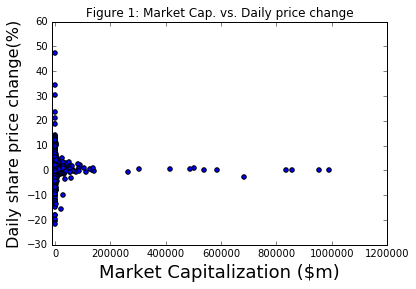

In [3]:



#------------------------------------
# Homework Set 3
#
# James Graham, jag912, N11252710
#
# This file downloads stock market data from the Yahoo Finance API, 
# and compares daily price changes to market capitalization
#
#------------------------------------
%matplotlib inline



import matplotlib.pyplot as plt
import requests
import re


mktcap_list  = []
pchange  = []
codes_list = []

with open('company_list_corrected.csv') as f:
    lines = f.readlines()[1:]

# Tidy text for parsing into 'codes','names','mktcap'
for line in lines:
    line = line.replace('"',"")
    line = line.replace(', '," ")
    line = line.replace(',,',",")
    line = line.replace(',Inc.', " Inc")

    # Only parse data that has an mktcap value
    if line.find('N/A') == -1:
        codes, name, mktcap = line.split(',')

        # Convert mktcap values to same units
        if "B" in mktcap:
            mktcap = mktcap.replace('B','')
            mktcap = float(mktcap)
            mktcap = mktcap*1000
        elif "M" in mktcap:
            mktcap = mktcap.replace('M','')
            mktcap = float(mktcap)
            mktcap = mktcap

        # Add mktcap and codes to lists
        mktcap_list.append(mktcap)
        codes_list.append(codes)

# Pull data from Yahoo finance, 200=maximum number of calls in single pull request
j=0
i=0
while i<len(codes_list):
    j=i+200
    codes_list_block = '+'.join(codes_list[i:j])

    # create the URL string
    url = 'http://finance.yahoo.com/d/quotes.csv?s=' + codes_list_block + '&f=p2'
    webdata=requests.get(url)

    # extract the actual numbers from the string
    p=re.findall("[-]?\d+[\.]?\d*",webdata.text)
    pchange = pchange + p
    i=j
i=0

# convert percentage change list to floats
pchange_list = [float(i) for i in pchange]

# plotting
fig = plt.figure()
plt.scatter(mktcap_list,pchange_list)

plt.xlabel('Market Capitalization ($m)', fontsize=18)
plt.ylabel('Daily share price change(%)', fontsize=16)
axes = plt.gca()
axes.set_xlim([-10000,1200000])
plt.title('Figure 1: Market Cap. vs. Daily price change')

plt.show()


# close the open csv file
f.close()


# ** Are stocks with lower market capitalization more volatile? **

According to data downloaded at the time of writing and displayed in Figure 1, yes. As market capitalization decreases, the range of daily share price changes increases from $[-10,10]$ to $[-30, 50]$. I do not know of a good reason for this. Perhaps higher market capitalization firms are traded more frequently so that their share prices are more stable, while lower market capitalziation firms are traded infrequently so that trades are associated with large price changes.   